In [1]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 16.0.2+7-67, mixed mode, sharing)
  Starting server from C:\Users\Hariprasath\AppData\Local\Programs\Python\Python310\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\HARIPR~1\AppData\Local\Temp\tmpfh6mkids
  JVM stdout: C:\Users\HARIPR~1\AppData\Local\Temp\tmpfh6mkids\h2o_Hariprasath_started_from_python.out
  JVM stderr: C:\Users\HARIPR~1\AppData\Local\Temp\tmpfh6mkids\h2o_Hariprasath_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,10 days
H2O_cluster_name:,H2O_from_python_Hariprasath_bo06tv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.838 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [2]:
data=h2o.import_file("https://h2o-public-test-data.s3.amazonaws.com/smalldata/gbm_test/BostonHousing.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [3]:

boston = pd.read_csv("BostonHousing.csv")
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = boston.drop('medv', axis=1)
X = scaler.fit_transform(X)

y = boston['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train a linear regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions on the testing data
y_pred = model.predict(X_test)


In [6]:
train, valid = data.split_frame(ratios=[0.7], seed=1234)

In [7]:
predictors = data.columns[:-1]
response = data.columns[-1]


In [8]:
model = H2OGeneralizedLinearEstimator(family="gaussian", link="identity")
model.train(x=predictors, y=response, training_frame=train)
predictions = model.predict(valid)
pred_vals = predictions.as_data_frame().values.flatten()
act_vals = valid[response].as_data_frame().values.flatten()

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Mean Squared Error: 32.78175296277362


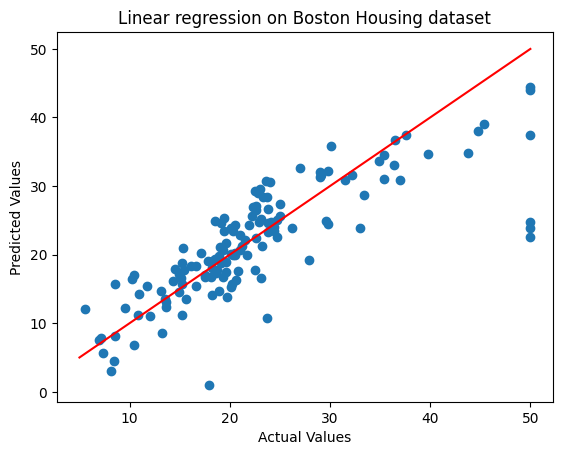

In [9]:
mse = np.mean((act_vals - pred_vals) ** 2)
print("Mean Squared Error:", mse)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.scatter(act_vals, pred_vals)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear regression on Boston Housing dataset")
plt.show()

In [10]:
h2o.shutdown()


H2O session _sid_b29b closed.


C:\Users\Hariprasath\AppData\Local\Temp\ipykernel_17628\2157244593.py:1: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown()
